
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [17]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [18]:
# complete here if you want to include more columns
salary_col = 'salary_monthly_NETO'
lang_col = 'tools_programming_languages'
framework_col = 'tools_frameworks'
relevant_columns = [lang_col, salary_col, framework_col]

In [28]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [56]:
# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 
    
# Create a new column with the list of languages
df.loc[:, 'cured_frameworks'] = df.tools_frameworks\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_frameworks') 
    

In [57]:
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})


df_frame = df.cured_frameworks\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'frameworks'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

In [84]:
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages,cured_frameworks
0,ninguno,Ninguno,43000.0,Ninguno,[ninguno],[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
1,javascript,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
1,python,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
2,ninguno,Ninguno,127000.0,Ninguno,[ninguno],[ninguno]
...,...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]


## Ejercicio 1 - Analisis Descriptivo

In [22]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["javascript", "sql", "html", "python", "java", "css", "bash/shell", "php"\
                         , ".net", "typescript", "c#", "go", "c++", "c", "vba", "kotlin", "groovy"\
                         ,"scala", "swift", "r", "perl", "assembler"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]
len(filtered_df_lang)

Esta es la lista de lenguajes que elegi. HTML y CSS no son lenguajes de programacion pero predominaron en las respuestas, por eso los inclui. El resto son los que considere que vale la pena considerar ya sea por la cantidad de casos o porque a pesar de tener pocos, son importantes de considerar, como el caso de perl o assembler. 

In [23]:
language_count = filtered_df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


In [9]:
cp = df_lang.copy()
cp = cp['tools_programming_languages'].dropna()
cp = cp.str.strip()
cp = cp[cp.str.contains("\w+ \w+") & ~cp.str.contains("Ninguno de los anteriores")]
#cp = cp.str.split(", ").str[-1]
cp

21      Bash/Shell, C#, CSS, HTML, Java, Javascript, P...
21      Bash/Shell, C#, CSS, HTML, Java, Javascript, P...
21      Bash/Shell, C#, CSS, HTML, Java, Javascript, P...
21      Bash/Shell, C#, CSS, HTML, Java, Javascript, P...
21      Bash/Shell, C#, CSS, HTML, Java, Javascript, P...
                              ...                        
6029                       .NET, SQL, VBA, Visual Basic 6
6029                       .NET, SQL, VBA, Visual Basic 6
6029                       .NET, SQL, VBA, Visual Basic 6
6029                       .NET, SQL, VBA, Visual Basic 6
6029                       .NET, SQL, VBA, Visual Basic 6
Name: tools_programming_languages, Length: 242, dtype: object

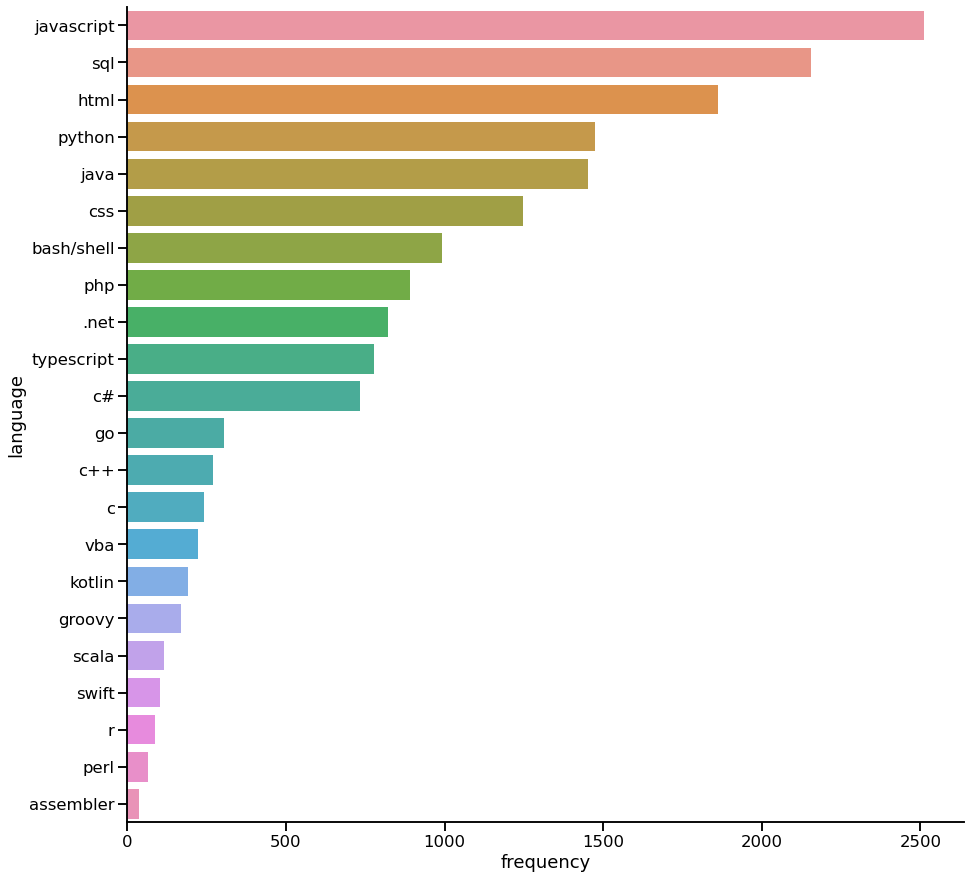

In [24]:
fig = plt.figure(figsize=(15,15))
seaborn.barplot(data = language_count[language_count['frequency'] > 11], x='frequency', y='language')
seaborn.despine()

### Algunas consideraciones sobre el analisis.

- Tome en cuenta solamente aquellos lenguajes que se repiten mas de 10 veces en la muestra, considerando que 10 repeticiones es una cantidad significativa para analizar. 
- Dependiendo del momento en el que se hizo la encuesta, los salarios pueden tener mas valor si se tiene en cuenta la inflacion. Se toman en cuenta solo los salarios mayores a 10000

- El que es desarrollador web sabe mas de uno de estos lenguajes. Para el caso de SQL en particular, se puede trabajar solo con ese lenguaje, o se puede conocer y utilizar dentro de un contexto de desarrollo web. Esto puede que influya en el salario, dado que un programador fullstack que sabe sql puede tener distinto valor (salario) que un analista IT. En base a este analisis decido tomar en cuenta la columna <span style="color:red">*'tools_frameworks'*</span> que nos brinda un poco mas de informacion sobre el tipo de trabajo que se hace con el lenguaje de programacion. Una cosa que podemos asumir para simplificar, es que si ademas de varios lenguajes de programacion, se especifica un framework, es porque se trabaja en desarrollo web. Dentro del analisis se puede especificar cual es el framework con el que se trabaja para saber que no le estamos errando. 

In [15]:
df.loc[:, ['tools_programming_languages','tools_frameworks']]

,tools_programming_languages,tools_frameworks
0,Ninguno,Ninguno
1,"HTML, Javascript, Python","Django, jQuery"
2,Ninguno,Ninguno
3,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress"
4,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js"
...,...,...
6090,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...","Bootstrap, Drupal, jQuery, Symfony, WordPress"
6091,Ninguno de los anteriores,Ninguno de los anteriores
6092,Ninguno de los anteriores,Ninguno de los anteriores
6093,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",Symfony


#### _Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante_

Las visualizaciones van a estar orientadas a mostrar la relacion entre las columnas de lenguaje y framework con respecto al salario. 

La columna de lenguajes ya esta curada, pero faltaria armar un df que tenga toda la columna curada de lenguajes pero tambien con producto cartesiano de todos los frameworks. De forma que si se usa python y javascript para DJango y Jquery, aparezca python-django, python-jquery, javascript-django, javascript-jquery, todos asociados al mismo sueldo. 

Como no se como hacer lo que queiro hacer, lo voy a escribir. quiero armar un df con todos los framework y los lenguajes desplegados. contabilizar los casos para los lenguajes mas populares emparejados o no con algun framework. 

In [49]:
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages,cured_frameworks
0,ninguno,Ninguno,43000.0,Ninguno,[ninguno],[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
1,javascript,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
1,python,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
2,ninguno,Ninguno,127000.0,Ninguno,[ninguno],[ninguno]
...,...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]


In [8]:
# Apply same logic of languages to frameworks and add it to df_lang

df_lang.loc[:, 'cured_frameworks'] = df_lang.tools_frameworks\
    .apply(split_languages)
if 'cured_frameworks' not in relevant_columns:
    relevant_columns.append('cured_frameworks') 

    

In [72]:
df_lang = df_lang.reset_index()

In [1]:
df_lang

NameError: name 'df_lang' is not defined

In [11]:
df_lang.cured_frameworks\
    .apply(pd.Series).stack()\
    .reset_index(level=-1).to_frame()\
    .join(df_lang[relevant_columns])\
    .rename(columns={0: 'framework'})

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [10]:
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages,cured_frameworks
0,ninguno,Ninguno,43000.0,Ninguno,[ninguno],[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
1,javascript,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
1,python,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
2,ninguno,Ninguno,127000.0,Ninguno,[ninguno],[ninguno]
...,...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]


In [74]:
df_lang[relevant_columns]

,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages,cured_frameworks
0,Ninguno,43000.0,Ninguno,[ninguno],[ninguno]
1,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
2,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
3,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]","[django, jquery]"
4,Ninguno,127000.0,Ninguno,[ninguno],[ninguno]
...,...,...,...,...,...
17995,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
17996,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
17997,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]
17998,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ...",[symfony]


In [ ]:
language_count[language_count['frequency'] > 11]

In [26]:
filtered_df_lang[filtered_df_lang["programming_language"] == "python"]["salary_monthly_NETO"]

,programming_language,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"jQuery, WordPress","[bash/shell, c, css, html, java, javascript, p..."
9,python,"Assembler, Bash/Shell, C, C#, Python, R",39000.0,"Flask, Torch, WordPress","[assembler, bash/shell, c, c#, python, r]"
10,python,"HTML, Javascript, Python",36800.0,"Bootstrap, Django, jQuery","[html, javascript, python]"
11,python,"Bash/Shell, Python",94621.0,"Bootstrap, Django","[bash/shell, python]"
...,...,...,...,...,...
6085,python,"C#, CSS, HTML, Javascript, Python, SQL, TypeSc...",53784.0,"Angular, Bootstrap, Django, jQuery, Node.js, R...","[c#, css, html, javascript, python, sql, types..."
6086,python,"Java, PHP, Python, SQL",82000.0,"Drupal, Flask, Hadoop, Hibernate, jQuery, Spri...","[java, php, python, sql]"
6087,python,Python,120000.0,Ninguno de los anteriores,[python]
6089,python,"Bash/Shell, Python, SQL",130000.0,NaN,"[bash/shell, python, sql]"


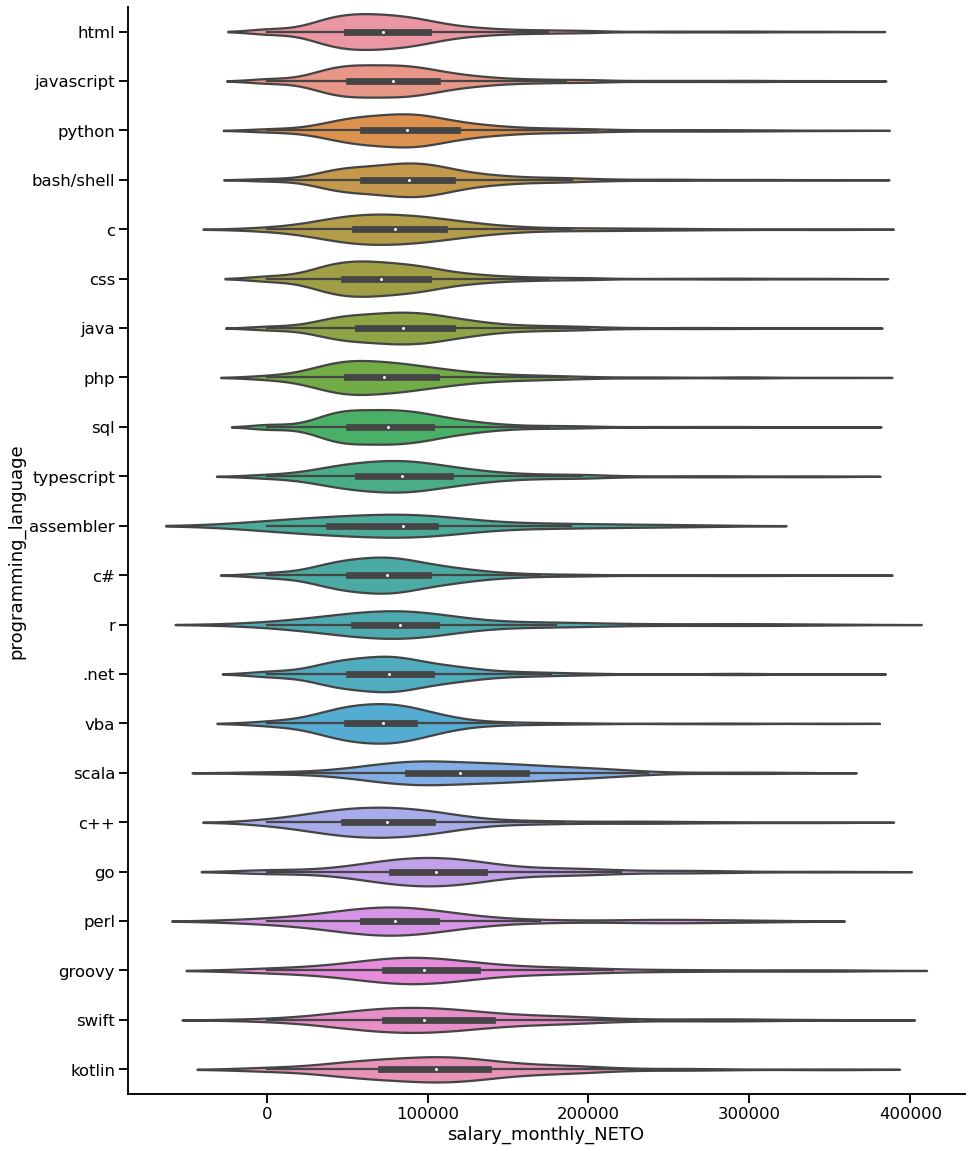

In [40]:
fig = plt.figure(figsize=(15, 20))
g = seaborn.violinplot(
    data=clean_outliers(filtered_df_lang, "salary_monthly_NETO"), 
    x='salary_monthly_NETO',
    y='programming_language', 
)
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

In [55]:
df_frame

,frameworks,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages
0,ninguno,Ninguno,43000.0,Ninguno,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
2,ninguno,Ninguno,127000.0,Ninguno,[ninguno]
...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."


In [58]:
framework_count = df_frame.frameworks.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'framework', 'frameworks': 'frequency'})
framework_count

,framework,frequency
0,node.js,1241
1,bootstrap,1166
2,jquery,1086
3,react.js,1030
4,angular,870
...,...,...
384,novell,1
385,powercenter,1
386,un,1
387,siem,1


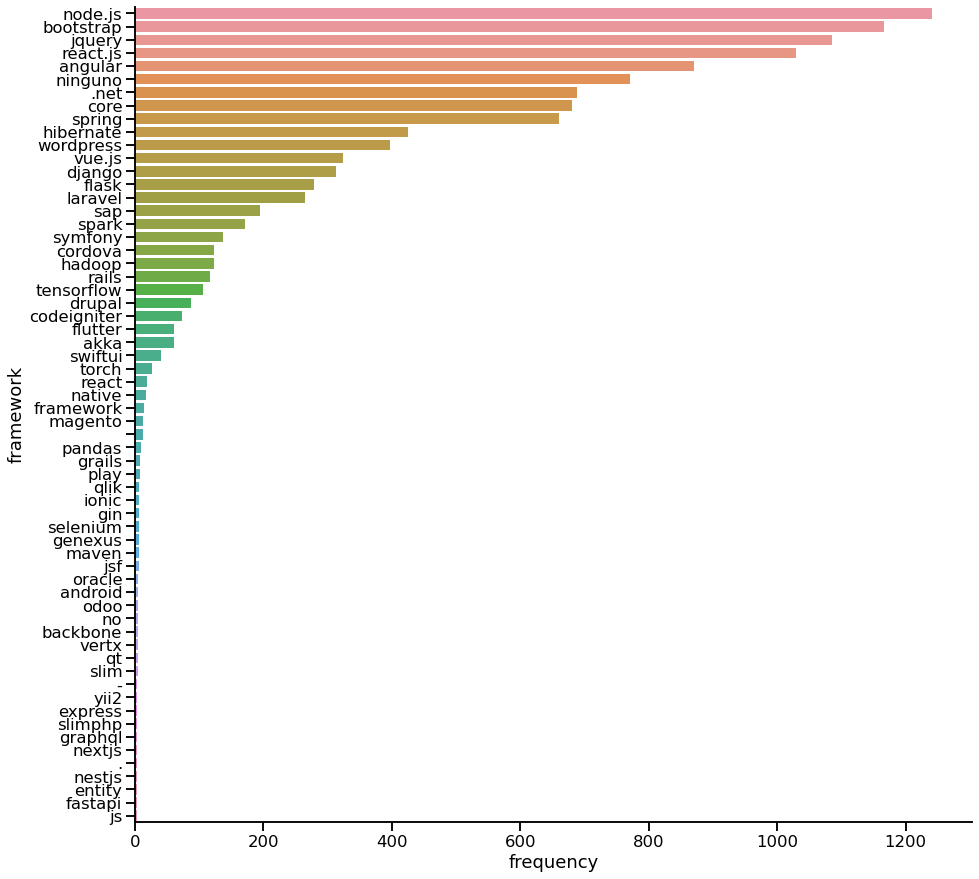

In [60]:
fig = plt.figure(figsize=(15,15))
seaborn.barplot(data = framework_count[framework_count['frequency'] > 3], x='frequency', y='framework')
seaborn.despine()

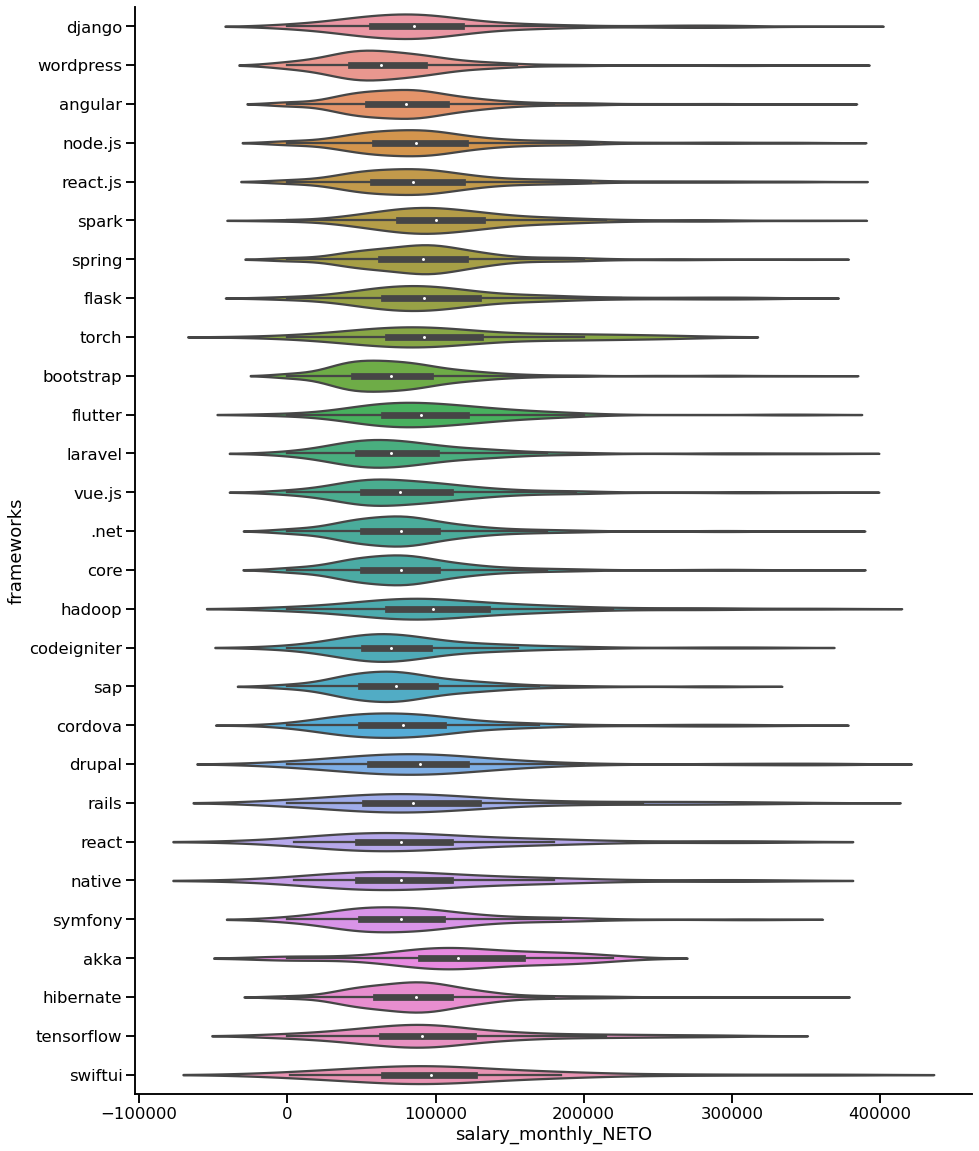

In [86]:
interesting_frameworks = ["node.js", "bootstrap", "react.js", "angular", ".net", "core", "spring",\
                          "hibernate", "wordpress", "vue.js", "django", "flask", "laravel", "sap", "spark", "symfony"\
                         , "cordova", "hadoop", "rails", "tensorflow", "drupal", "codeigniter", "flutter", "akka", "swiftui", "torch"\
                         , "react", "native"]
filtered_df_frame = df_frame[df_frame.frameworks.isin(interesting_frameworks)]
filtered_df_frame[:5]
len(filtered_df_frame)

fig = plt.figure(figsize=(15, 20))
g = seaborn.violinplot(
    data=clean_outliers(filtered_df_frame, "salary_monthly_NETO"), 
    x='salary_monthly_NETO',
    y='frameworks', 
)
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

In [69]:
interesting_frameworks

['node.js',
 'bootstrap',
 'jquery',
 'react.js',
 'angular',
 '.net',
 'core',
 'spring',
 'hibernate',
 'wordpress',
 'vue.js',
 'django',
 'flask',
 'laravel',
 'sap',
 'spark',
 'symfony',
 'cordova',
 'hadoop',
 'rails',
 'tensorflow',
 'drupal',
 'codeigniter',
 'flutter',
 'akka',
 'swiftui',
 'torch',
 'react',
 'native',
 'pandas']

In [72]:
lang_frame = 
{"node.js": ["javascript"],
"bootstrap": ["javascript"],
"jquery": ["javascript"],
"react.js": ["javascript"],
"angular": ["javascript"],
".net": [],
"spring": ["java"],
"hibernate": ["java"],
"wordpress": ["php"],
"vue.js": ["javascript"],
"django": ["python"],
"flask": ["python"],
"laravel": ["php"],
"sap": [],
"spark": ["java"],
"symfony": ["php"],
"cordova": ["javascript"],
"hadoop": ["java"],
"rails": ["ruby"],
"drupal": ["php", "javascript"],
"codeigniter": ["php"],
"flutter": ["c", "c++"],
"akka": ["java", "scala"],
"swiftui": ["swift"],
"torch": ["c"],
"react": ["javascript"]
}

In [73]:
lang_frame

{'node.js': ['javascript'],
 'bootstrap': ['javascript'],
 'jquery': ['javascript'],
 'react.js': ['javascript'],
 'angular': ['javascript'],
 '.net': [],
 'spring': ['java'],
 'hibernate': ['java'],
 'wordpress': ['php'],
 'vue.js': ['javascript'],
 'django': ['python'],
 'flask': ['python'],
 'laravel': ['php'],
 'sap': [],
 'spark': ['java'],
 'symfony': ['php'],
 'cordova': ['javascript'],
 'hadoop': ['java'],
 'rails': ['ruby'],
 'drupal': ['php', 'javascript'],
 'codeigniter': ['php'],
 'flutter': ['c', 'c++'],
 'akka': ['java', 'scala'],
 'swiftui': ['swift'],
 'torch': ['c'],
 'react': ['javascript']}

In [88]:
df_lang.query("programming_language == 'sql' & tools_frameworks == 'Ninguno'")["salary_monthly_NETO"]

20       80000.0
57       75000.0
109         95.0
110      51209.0
112      39000.0
          ...   
2266     36000.0
2271     43000.0
2682    135000.0
4519    105000.0
5802     85000.0
Name: salary_monthly_NETO, Length: 153, dtype: float64

In [78]:
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages
0,ninguno,Ninguno,43000.0,Ninguno,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
2,ninguno,Ninguno,127000.0,Ninguno,[ninguno]
...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Symfony,"[c, c++, html, java, javascript, php, python, ..."


In [89]:
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [91]:
df.work_role[0:100]

0                  Consultant
1                   Developer
2                     Infosec
3     SysAdmin / DevOps / SRE
4                   Developer
               ...           
95                  Developer
96    SysAdmin / DevOps / SRE
97                  Developer
98                  Developer
99                  Developer
Name: work_role, Length: 100, dtype: object